## Particle within radius or overlap calculations

In [1]:
#user-defined
import ipynb.fs.full.helper as hp

#dataframes
import pandas as pd
import h5py


#suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#math
import numpy as np
import math as m
import scipy
import scipy.interpolate as interpolate
from scipy.spatial.distance import cdist
from scipy import integrate
pd.TimeSeries = pd.Series 

#plots
import pylab as plt
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.lines as mlines
from IPython.display import HTML

#misc
import time
np.set_printoptions(suppress=True)

In [2]:
set_number = 5

dir = '~/Documents/Myfiles/DataAnalysis/data/Sprints/Run03/Set0'+str(set_number)+'/'

wind_load= 'wind0'+str(set_number)+'Run03_Interpolated.hdf'
wind_load_small = 'wind0'+str(set_number)+'Run03_Interpolatedsmall.hdf'

windn = pd.read_hdf(dir+wind_load)
windsm = pd.read_hdf(dir+wind_load_small)

### Calculate Expected encounters

In [15]:
df = pd.DataFrame()
df = windsm
dt= df.master_time[1]-df.master_time[0]

In [16]:
# storing the odor location in a numpy array to avoid reading pandas
odor_position = np.array([[df.xsrc[i],df.ysrc[i]] for i in range (len(df.xsrc))]) 

In [26]:
#summation till Nth particle
eastwest = [np.sum(df.U[j:])*dt for j in range(0,len(df))]
northsouth = [np.sum(df.V[j:])*dt for j in range(0,len(df))]

### Is Encountered odor particle within the Calculated particle radius?

The loop below computes locations of the eastwest and northsouth particles and compares with a radius (distance) to interpret if the encountered particle were close to calculated particle. The execution for the loop is 23.56 seconds for 59770 rows of data

The loop below takes in ith eastwest and subtracts the ith U and V elements to get the i-1 state, as the eastwest is summation of all the wind positions. 

[3 + 2 + 1] = [6]

hence ith _state = 6

_state = _state-3

_state = _state-2



In [27]:
#start = time.time()
odor_presence=[]
l = len(df)
for i in range((len(eastwest))-1, -1, -1):

    odor_pos = [odor_position[i]]  
    if(i == 0):
        radius = np.zeros(1)
        wind_pos = np.array([[0,0]])
    else:
        eastwest = np.resize(np.array([eastwest-df.U[i]*dt]),(1,i)).flatten() 
        northsouth = np.resize(np.array([northsouth-df.V[i]*dt]),(1,i)).flatten()
        wind_pos = np.vstack([eastwest,northsouth]).T   
        radius = np.arange(start = i, stop = 0, step = -1)**0.5*0.01
        #TODO: Model better radius
        
    distance = cdist(odor_pos,wind_pos).flatten()   # cdist compares distance for all the points in both arrays
    
    distance = np.min(distance)
    x = distance<=radius
    if (x.any() == True):
        odor_presence.append(1)
    else:
        odor_presence.append(0)
        
#time.time()-start

In [28]:
#value is compared with encountered particle and concentration is copied into the existing data frame
odor_expected = []
for i in range(len(odor_presence)):
    if(odor_presence[i]==1):
        odor_expected.append(1)
    else:
        odor_expected.append(0) #as per sensor reading anything below 1.5v
df['odor_expected'] = odor_expected

In [30]:
df.to_hdf('~/Documents/Myfiles/DataAnalysis/data/Sprints/Run03/Set05/wind05Run03_expected_small.hdf', key='df', mode='w')

Text(0.5, 0.98, 'Radius time**0.5*10')

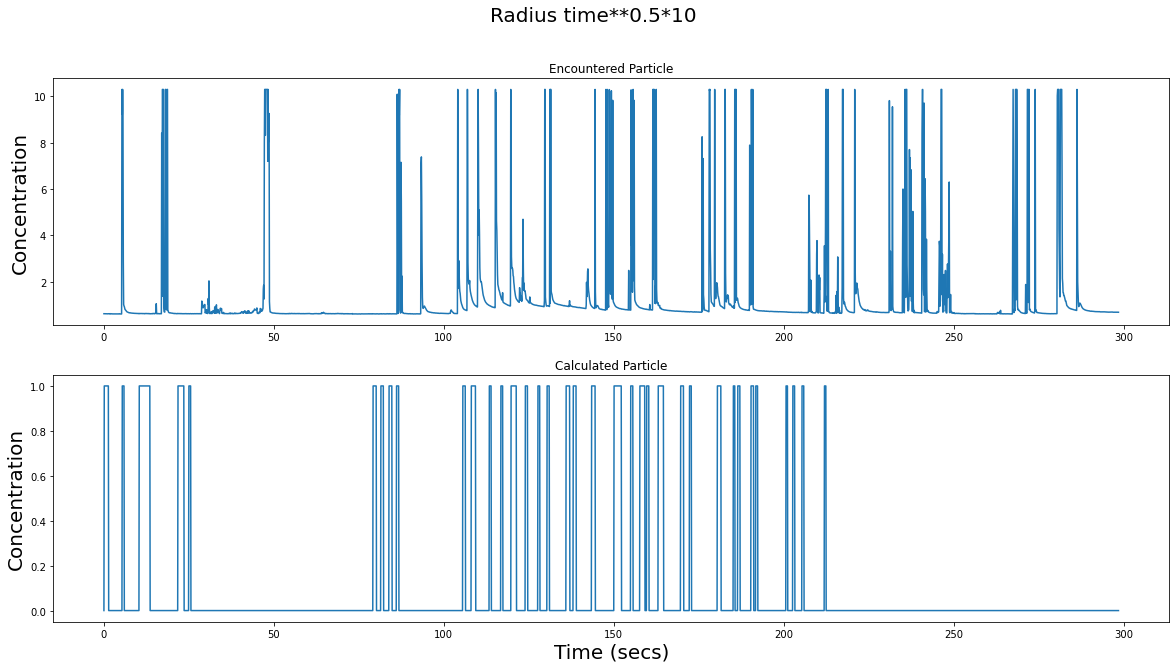

In [29]:
f, (ax1,ax2) = plt.subplots(2, 1,figsize=(20,10))
ax1.plot(df.sync_time, df.odor)
ax1.set_ylabel('Concentration', fontsize=20)
ax1.title.set_text('Encountered Particle')
ax2.plot(df.sync_time,df.odor_expected)
ax2.set_xlabel('Time (secs)', fontsize=20)
ax2.set_ylabel('Concentration', fontsize=20)
ax2.title.set_text('Calculated Particle')

f.suptitle('Radius time**0.5*10', fontsize =20)

Text(0.5, 0.98, 'Radius time**2*0.01')

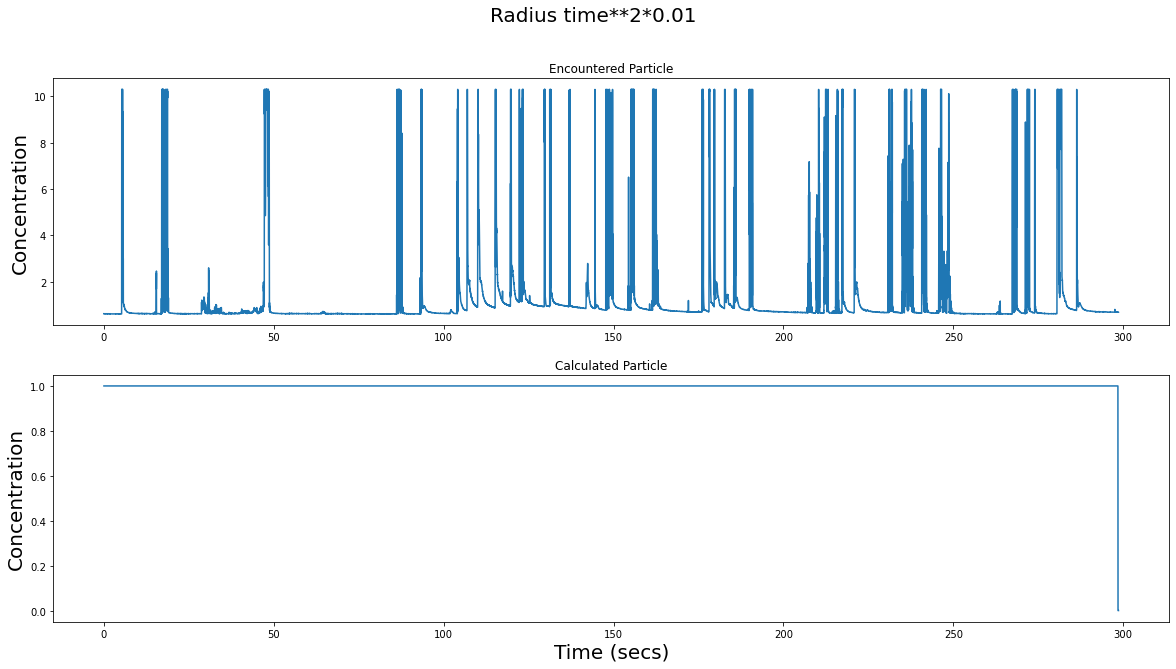

In [96]:
f, (ax1,ax2) = plt.subplots(2, 1,figsize=(20,10))
ax1.plot(df.sync_time, df.odor)
ax1.set_ylabel('Concentration', fontsize=20)
ax1.title.set_text('Encountered Particle')
ax2.plot(df.sync_time,df.odor_expected)
ax2.set_xlabel('Time (secs)', fontsize=20)
ax2.set_ylabel('Concentration', fontsize=20)
ax2.title.set_text('Calculated Particle')

f.suptitle('Radius time**2*0.01', fontsize =20)

In [98]:
# f, (ax1,ax2) = plt.subplots(2, 1,figsize=(20,10))
# ax1.scatter(df.sync_time, df.odor, c=df.odor, s=5, cmap='magma')
# ax1.set_ylabel('Concentration', fontsize=20)
# ax1.title.set_text('Encountered Particle')
# ax2.scatter(df.sync_time,df.odor_expected, c=df.odor_expected, s=5, cmap='magma')
# ax2.set_xlabel('Time (secs)', fontsize=20)
# ax2.set_ylabel('Concentration', fontsize=20)
# ax2.title.set_text('Calculated Particle')